# House Price Prediction

In [2]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
f = open("test.csv")

In [110]:
#Reading the Dataset:
df1 = pd.read_csv('test.csv')
print(df1.shape) #checking no of rows and columns in the dataset.
df1.head()

(292, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [111]:
#Reading the Dataset:
df2 = pd.read_csv('train.csv')
print(df2.shape) #checking no of rows and columns in the dataset.
df2.head()

(1168, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [112]:
#combining the Dataframe and removing duplicates.
df = pd.concat([df1, df2]).drop_duplicates().reset_index(drop=True)
print(df.shape)
df.head()
#There are 1460 rows and 81 d-features in the dataset.

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,NaN
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml,NaN
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,NaN
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,NaN
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal,NaN


In [113]:
#using Pd.options display max columns to check entire rows and columns in dataset.
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [114]:
#Checking the datatypes of each feature:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [115]:
#Identifying Categorical and Neumerical Columns:
cols = df.columns
num_cols = df._get_numeric_data().columns.to_list()
cat_cols = list(set(cols)-set(num_cols))
print("Neumerical Columns")
print(num_cols)
print("Categorical Columns")
print(cat_cols)

Neumerical Columns
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
Categorical Columns
['Functional', 'GarageQual', 'GarageType', 'BsmtCond', 'Alley', 'SaleCondition', 'Condition2', 'RoofMatl', 'Condition1', 'Exterior2nd', 'BsmtExposure', 'Neighborhood', 'BldgType', 'Utilities', 'KitchenQual', 'BsmtQual', 'LandContour', 'HeatingQC', 'Fence', 'GarageCond', 'Exterior1st', 'ExterQual', 'Street', 'CentralAir', 'ExterCond', 'MSZoning', 'PavedDrive', 'MasVnrType', 'Foundation', 'BsmtFinType1', 'MiscFeature', 'RoofStyle', 'HouseS

In [116]:
#Lets Check for Duplicated Records.
dfd = df[df.duplicated()]
dfd.shape
#No Duplicate records found.

(0, 81)

               Total Missing Value
Id                               0
MSSubClass                       0
MSZoning                         0
LotFrontage                    259
LotArea                          0
Street                           0
Alley                         1369
LotShape                         0
LandContour                      0
Utilities                        0
LotConfig                        0
LandSlope                        0
Neighborhood                     0
Condition1                       0
Condition2                       0
BldgType                         0
HouseStyle                       0
OverallQual                      0
OverallCond                      0
YearBuilt                        0
YearRemodAdd                     0
RoofStyle                        0
RoofMatl                         0
Exterior1st                      0
Exterior2nd                      0
MasVnrType                       8
MasVnrArea                       8
ExterQual           

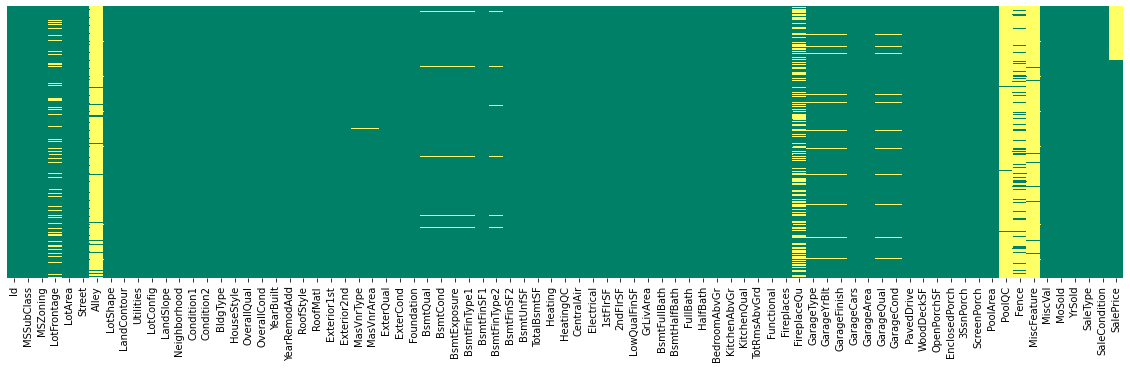

In [117]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='summer')
plt.show()

In [118]:
#Checking the Columns that have Missing Value:
print('Columns having missing values are as follows:')
for i in df.isnull().any().index:
    if (df.isnull().any()[i]):
        print(i)

Columns having missing values are as follows:
LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature
SalePrice


In [119]:
#Checking the percentage of Missing Values.
print('\nPercentage of missing values in each column Space:')
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)[:20]


Percentage of missing values in each column Space:


PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
SalePrice       0.200000
LotFrontage     0.177397
GarageQual      0.055479
GarageCond      0.055479
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [120]:
#Deleting the columns which have more than 40% of missing records:
df = df.drop('PoolQC', axis=1)
df = df.drop('MiscFeature', axis=1)
df = df.drop('Alley', axis=1)
df = df.drop('Fence',axis=1)
df = df.drop('FireplaceQu',axis=1)

In [121]:
#Lets check the shape again:
df.shape

(1460, 76)

In [122]:
#Deleting all rows having null values could lead loss of information replacing the neumerical cols with mean:
#Replacing the values by using mean.
for i in df._get_numeric_data().columns:
  df[i].fillna(df[i].mean(),inplace=True)

In [123]:
#Now lets check the Percentage of missing values in each column again
print(round(100*(df.isnull().sum()/len(df.index)), 2))

Id               0.00
MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.55
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinSF1       0.00
BsmtFinType2     2.60
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea 

In [124]:
#we will use simple imputer function from sklearn to remove null values in categorical Columns:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical']:
   df[col] = imp.fit_transform(df[col].values.reshape(-1,1))

In [125]:
#Again Checking Null Values:
df.isnull().values.any()
#No more null Values

False

In [126]:
#Checking the percentage of Loss of Information:
print("No. of Rows left = ", df.shape[0])
print("No. of Rows removed = ", 1460 - df.shape[0])
print("Percentage of Rows removed = {}%".format(round(100*(1460 - df.shape[0])/1460,2)))

No. of Rows left =  1460
No. of Rows removed =  0
Percentage of Rows removed = 0.0%


In [127]:
#Checking the value count and unique value of each categorical feature:
for col in df.columns:
    if df[col].dtypes == object:
        print(str(col)+':'+str(df[col].value_counts()))
        print('********************************************')

MSZoning:RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
********************************************
Street:Pave    1454
Grvl       6
Name: Street, dtype: int64
********************************************
LotShape:Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
********************************************
LandContour:Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
********************************************
Utilities:AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
********************************************
LotConfig:Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
********************************************
LandSlope:Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
********************************************
Neighborhood:NAmes      225
CollgCr    150
OldTown    113
Edwards  

In [128]:
#checking the Columns:
columns = list(df.columns)
print(df.shape)
print(columns)

(1460, 76)
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 

In [129]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,22.024023,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,70748.125717
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,137800.000000
50%,730.500000,50.000000,70.049958,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,181477.005993
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,196250.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [130]:
#Most of the columns are right skewed as mean is more than the median.
#There is possibility of presence of outliers as mean of some features are greater than median.
#In some of features theres an huge difference between 75% and max which confirm the presence of outliers.
#Some of the columns are left skewed as median is more than mean.
#All the Houses are built between 1872 to 2010.

In [131]:
#Exploratory Data Analysis

#Univarite Analysis

#Multivariate Analysis

#Bivariate Analysis

#Here we check the relationship between different independant and dependant variable

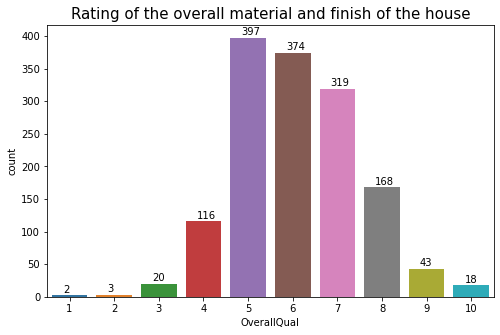

In [132]:
#Univariate Analysis.
plt.figure(figsize=(8,5))
ax = sns.countplot(df['OverallQual'])
plt.title("Rating of the overall material and finish of the house",fontsize=15)
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')
#18 Houses have received perfect 10 Ratings.
#374 houses have average ratings of 6.
#397 houses have average ratings of 5.
#116 houses have average ratings of 4.

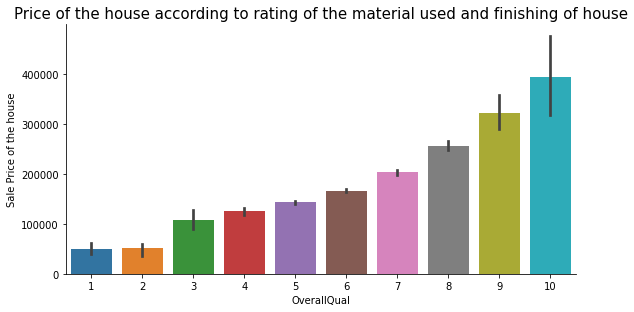

In [133]:
#Bivariate Analysis.
#Checking the relationship between ratings and price.
sns.factorplot(x="OverallQual",y="SalePrice",data=df,kind="bar",size = 4,aspect=2)
plt.title('Price of the house according to rating of the material used and finishing of house',fontsize=15)
plt.ylabel("Sale Price of the house")
plt.xticks(rotation='horizontal')
plt.show()
#Houses with higher ratings have higher prices.

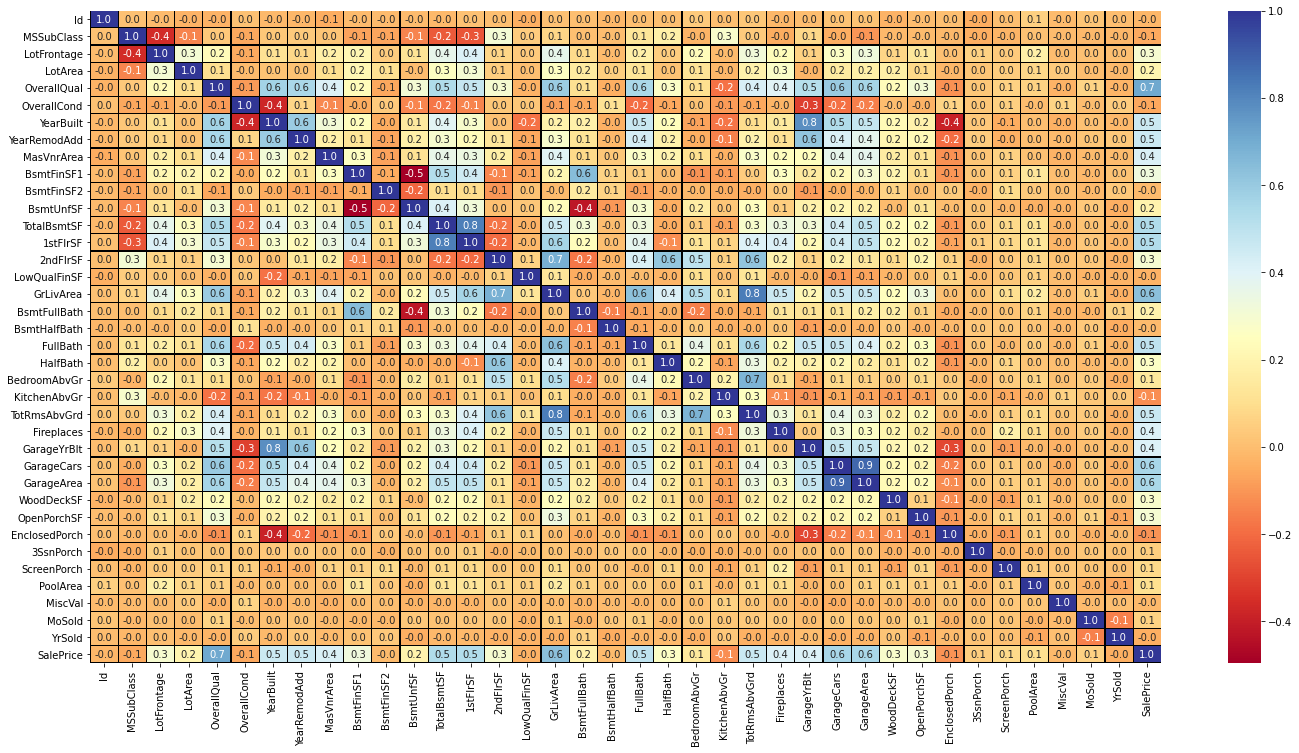

In [134]:
#Lets check for corelation again and remove highly corelated feature as discussed above:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="RdYlBu",linecolor="black")
plt.show()

Text(0.5, 1.0, 'corelation with target variable')

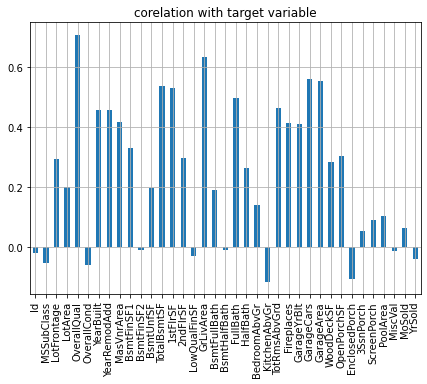

In [135]:
#corelation with target column:
plt.figure(figsize=(7,5))
df.drop('SalePrice',axis=1).corrwith(df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title('corelation with target variable')

In [136]:
#Checking neumerical columns:
#Lets create a List Comprehensions.
neumerical_columns = [columns for columns in df.columns if df[columns].dtypes != 'O']
print('Length of neumerical columns:',len(neumerical_columns))
#Checking the top 5 rows:
columns = list(df[neumerical_columns])
print(columns)
#38 neumerical columns features are present.

Length of neumerical columns: 38
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [137]:
#Checking for Temporal Variables known as :
temporal_columns = [columns for columns in neumerical_columns if 'Yr' in columns or 'Year' in columns]
temporal_columns

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

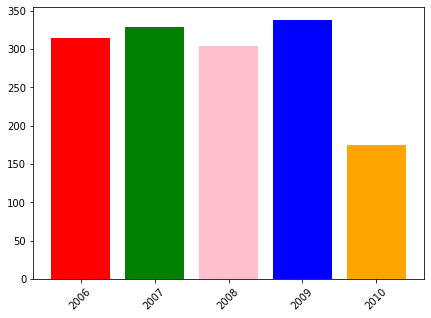

In [138]:
#Plotting a graph and checking in which year highest no of houses are sold:
df['YrSold'].value_counts()[:5]
plt.figure(figsize=(7,5))
plt.bar(list(df['YrSold'].value_counts()[:5].keys()),list(df['YrSold'].value_counts()[:5]),color=["blue","green","red","pink","orange"])
plt.xticks(rotation=45)
plt.show()
#Most of the houses are sold in year 2007 and 2009

In [139]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [140]:
#Cheking the count of skewed featues.
print("Total count of numeric features: ",len(df.skew()))
print("count of features which are significantly skewed: ",len(df.skew().loc[abs(df.skew())>0.5]))
df.skew()

Total count of numeric features:  38
count of features which are significantly skewed:  30


Id                0.000000
MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [141]:
import scipy.stats as stat
import pylab

In [142]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

<Figure size 360x360 with 0 Axes>

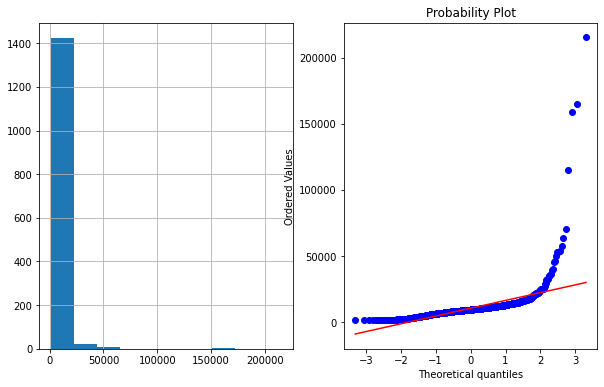

In [143]:
#We can check for skewness by using Distrution plot:
plt.figure(figsize=(5,5))
plot_data(df,'LotArea')

<Figure size 360x360 with 0 Axes>

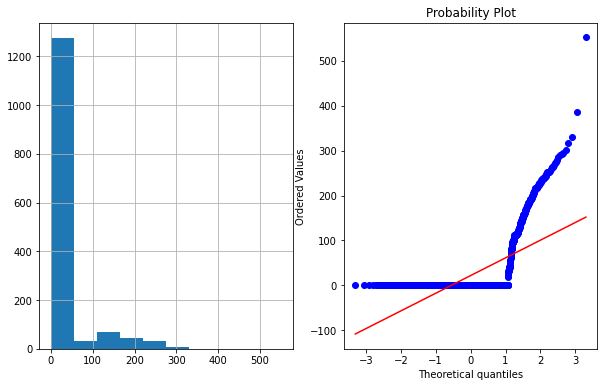

In [144]:
#We can check for skewness by using Distrution plot:
plt.figure(figsize=(5,5))
plot_data(df,'EnclosedPorch')

In [145]:
#We can see that some of the features are not normally distributed skewness is present 
#for skewed Data Logarthim Tranformation works fine.
#If the skewness value is greater than 0.55 we consider that the feature is skewed.
#We will use Zscore to remove outliers and some of the skewness.

In [146]:
#Checking Categorical Columns
categorical_columns = [columns for columns in df.columns if df[columns].dtypes=='O']
columns = list(categorical_columns)
print(columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [147]:
#Lets convert Categorical into neumerical:
for feature in categorical_columns:
    temp = df.groupby(feature)['SalePrice'].count()/len(df)
    temp_df = temp[temp>0.01].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],'rare_var')

In [148]:
#Converting Categorical into neumerical column:
for feature in categorical_columns:
    labels = df.groupby([feature])['SalePrice'].mean().sort_values().index
    labels = {k:i for i,k in enumerate(labels,0)}
    df[feature] = df[feature].map(labels)

In [149]:
#Checking the head and shape.
print(df.shape)
df.head()

(1460, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,337,20,3,86.000000,14157,1,1,3,0,2,0,20,2,1,3,4,9,5,2005,2006,2,0,9,9,3,200.0,2,2,4,3,2,3,5,1249,3,0,673,1922,2,4,1,3,1922,0,0,1922,1,0,2,0,3,1,2,8,4,1,3,2005.0,2,3,676,1,2,2,178,51,0,0,0,0,0,7,2007,2,3,181477.005993
1,1018,120,3,70.049958,5814,1,1,1,0,4,0,20,2,1,4,4,8,5,1984,1984,0,0,5,5,1,0.0,2,2,2,2,2,2,5,1036,3,0,184,1220,2,3,1,3,1360,0,0,1360,1,0,1,0,1,1,2,4,4,1,3,1984.0,1,2,565,1,2,2,63,0,0,0,0,0,0,8,2009,0,2,181477.005993
2,929,20,3,70.049958,11838,1,0,1,0,1,0,15,2,1,3,4,8,5,2001,2001,2,0,9,9,1,0.0,2,2,4,2,2,2,4,0,3,0,1753,1753,2,4,1,3,1788,0,0,1788,0,0,2,0,3,1,3,7,4,1,3,2001.0,1,2,522,1,2,2,202,151,0,0,0,0,0,6,2009,2,3,181477.005993
3,1148,70,3,75.000000,12000,1,0,0,0,1,0,16,2,1,3,5,7,7,1941,1950,0,0,1,1,1,0.0,1,2,2,1,2,0,0,275,3,0,429,704,2,4,1,3,860,704,0,1564,0,0,1,1,3,1,0,7,4,1,3,1941.0,0,1,234,1,2,2,0,0,0,0,0,0,0,7,2009,2,3,181477.005993
4,1227,60,3,86.000000,14598,1,1,1,0,4,0,18,1,1,3,5,6,5,2007,2007,0,0,9,9,3,74.0,2,2,4,2,2,1,4,0,3,0,894,894,2,4,1,3,894,1039,0,1933,0,0,2,1,4,1,2,9,4,1,4,2007.0,2,3,668,1,2,2,100,18,0,0,0,0,0,1,2008,2,3,181477.005993


In [150]:
#Checking the columns again:
columns = list(df.columns)
print("List of all columns:",columns)

List of all columns: ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 

In [151]:
#Using Min Max Scaler: Transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set e.g. between zero and one.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # default=(0, 1)
neumerical = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
df_minmax_transform = pd.DataFrame(data = df)
df_minmax_transform[neumerical] = scaler.fit_transform(df_minmax_transform[neumerical])
df_minmax_transform.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,337,0.000000,0.75,0.222603,0.060095,1.0,0.333333,1.000000,0.0,0.50,0.0,0.909091,0.4,1.0,0.75,0.8,0.888889,0.50,0.963768,0.933333,1.0,0.0,0.9,0.9,1.000000,0.12500,0.666667,0.666667,1.0,1.000000,0.666667,1.000000,1.0,0.221297,0.6,0.0,0.288099,0.314566,1.0,1.00,1.0,1.0,0.364387,0.000000,0.0,0.299171,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.500000,1.0,0.333333,0.75,0.954545,1.0,0.75,0.476728,0.5,1.0,1.0,0.207701,0.093236,0.0,0.0,0.0,0.0,0.0,0.545455,0.25,0.666667,0.75,181477.005993
1,1018,0.588235,0.75,0.167979,0.021099,1.0,0.333333,0.333333,0.0,1.00,0.0,0.909091,0.4,1.0,1.00,0.8,0.777778,0.50,0.811594,0.566667,0.0,0.0,0.5,0.5,0.333333,0.00000,0.666667,0.666667,0.5,0.666667,0.666667,0.666667,1.0,0.183558,0.6,0.0,0.078767,0.199673,1.0,0.75,1.0,1.0,0.235429,0.000000,0.0,0.193293,0.333333,0.0,0.333333,0.0,0.125,0.333333,0.666667,0.166667,1.0,0.333333,0.75,0.763636,0.5,0.50,0.398449,0.5,1.0,1.0,0.073512,0.000000,0.0,0.0,0.0,0.0,0.0,0.636364,0.75,0.000000,0.50,181477.005993
2,929,0.000000,0.75,0.167979,0.049256,1.0,0.000000,0.333333,0.0,0.25,0.0,0.681818,0.4,1.0,0.75,0.8,0.777778,0.50,0.934783,0.850000,1.0,0.0,0.9,0.9,0.333333,0.00000,0.666667,0.666667,1.0,0.666667,0.666667,0.666667,0.8,0.000000,0.6,0.0,0.750428,0.286907,1.0,1.00,1.0,1.0,0.333639,0.000000,0.0,0.273926,0.000000,0.0,0.666667,0.0,0.375,0.333333,1.000000,0.416667,1.0,0.333333,0.75,0.918182,0.5,0.50,0.368124,0.5,1.0,1.0,0.235706,0.276051,0.0,0.0,0.0,0.0,0.0,0.454545,0.75,0.666667,0.75,181477.005993
3,1148,0.294118,0.75,0.184932,0.050013,1.0,0.000000,0.000000,0.0,0.25,0.0,0.727273,0.4,1.0,0.75,1.0,0.666667,0.75,0.500000,0.000000,0.0,0.0,0.1,0.1,0.333333,0.00000,0.333333,0.666667,0.5,0.333333,0.666667,0.000000,0.0,0.048724,0.6,0.0,0.183647,0.115221,1.0,1.00,1.0,1.0,0.120698,0.340920,0.0,0.231726,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.000000,0.416667,1.0,0.333333,0.75,0.372727,0.0,0.25,0.165021,0.5,1.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.545455,0.75,0.666667,0.75,181477.005993
4,1227,0.235294,0.75,0.222603,0.062156,1.0,0.333333,0.333333,0.0,1.00,0.0,0.818182,0.2,1.0,0.75,1.0,0.555556,0.50,0.978261,0.950000,0.0,0.0,0.9,0.9,1.000000,0.04625,0.666667,0.666667,1.0,0.666667,0.666667,0.333333,0.8,0.000000,0.6,0.0,0.382705,0.146318,1.0,1.00,1.0,1.0,0.128499,0.503148,0.0,0.301243,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.666667,0.583333,1.0,0.333333,1.00,0.972727,1.0,0.75,0.471086,0.5,1.0,1.0,0.116686,0.032907,0.0,0.0,0.0,0.0,0.0,0.000000,0.50,0.666667,0.75,181477.005993


In [152]:
#We can see above that some of the features are not normally distributed skewness is present 
#for skewed Data Logarthim Tranformation works fine or we can also use Boxcox Method.
#If the skewness value is greater than 0.55 we consider that the feature is skewed.
for col in df.columns:
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [153]:
#Creating a copy of our dataset
df1 = df.copy()

In [154]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.
#Let check wheather any outliers are present or not and if yes lets normalize them:
from scipy.stats import zscore
zscore = abs(zscore(df1))
print("Before removal of outliers:",df1.shape)
df1_final = df1.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df1_final.shape)

Before removal of outliers: (1460, 76)
After removal of outliers: (646, 76)


In [1]:
646/1460*100

44.24657534246575

In [2]:
#Checking the loss of Information after removal of outliers:
A = 100
B = 44.24657534246575
z = A-B
print("Total loss of imformation after removal of outliers is:",z)

Total loss of imformation after removal of outliers is: 55.75342465753425


In [157]:
#We are lossing 55.75 of imformation after removing outliers hence we are not going to remove outliers.

In [191]:
#Creating independent and Dependent Variable:
columns = df.columns.tolist()
#Filter the column and remove data we dont want:
columns = [c for c in columns if c not in ['SalePrice','Id']]
#Store the variable we are predicting:
target = "SalePrice"
#Define a random state:
state = np.random.RandomState(42)
X = df[columns]
y = df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0],X.shape[1]))
print(X.shape)
print(y.shape)

(1460, 74)
(1460,)


In [160]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=55)

In [161]:
#Importing the Model for Predictions Process:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
#Import Error Metrics:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [162]:
model = [LinearRegression(),Lasso(),Ridge(),ElasticNet(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor()]
for m in model:
    m.fit(X_train,y_train)
    print("Score of",m, "is:",m.score(X_train,y_train))
    y_predict = m.predict(X_test)
    print("Error:")
    print('Mean absolute error:',mean_absolute_error(y_test,y_predict))
    print('Mean squared error:',mean_squared_error(y_test,y_predict))
    print('Root mean squared is ',np.sqrt(mean_squared_error(y_test,y_predict)))
    print('r2 score is:',r2_score(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False) is: 0.7178526258864328
Error:
Mean absolute error: 0.12844907707313616
Mean squared error: 0.03167357636472843
Root mean squared is  0.17797071771706835
r2 score is: 0.7105744758982617
******************************************************************


Score of Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) is: 0.4264284034026835
Error:
Mean absolute error: 0.18452164435242138
Mean squared error: 0.05848272665486529
Root mean squared is  0.24183202156634528
r2 score is: 0.4655989074908431
******************************************************************


Score of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001) is: 0.7175769234695533
Error:
Mean absolute error: 0.12

In [163]:
#Lets Check with Linear Regression:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [164]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for linear Regression:",cross_val_score(lr,X,y,cv=5,scoring="r2").std())

mean r2_score for Linear Regression: 0.6383358028555641
standard deviation in r2_score for linear Regression: 0.31997344837547853


In [165]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.1310818817837006
MSE: 0.03240180658587045
RMSE: 0.18000501822413298


In [166]:
#Lets Ckeck with Lasso Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [167]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=lasso,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [168]:
#Fetching best alpha value:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 0.001}
0.6650022055591946


In [169]:
#Using Best alpha value:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [170]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for lasso Regression:",cross_val_score(lasso,X,y,cv=5,scoring="r2").std())

mean r2_score for Lasso Regression: 0.6436838930952848
standard deviation in r2_score for lasso Regression: 0.3225349706014105


In [171]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.1310818817837006
MSE: 0.03240180658587045
RMSE: 0.18000501822413298


In [172]:
#Lets Ckeck with Ridge Regression by performing hyperparametre Tuning:
from sklearn.linear_model import Ridge
ridge = Ridge()

In [173]:
#Selecting the best alpha value:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param = {'alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(estimator=ridge,param_grid=param,cv=5,return_train_score=False)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [174]:
#Fetching best alpha value:
print(grid.best_params_)
print(grid.best_score_)

{'alpha': 1}
0.6534448629228298


In [175]:
#Using Best alpha value:
ridge = Ridge(alpha=1)
ridge.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [176]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Ridge Regression:",cross_val_score(ridge,X,y,cv=5,scoring="r2").std())

mean r2_score for Ridge Regression: 0.638996410215716
standard deviation in r2_score for Ridge Regression: 0.3202870139527322


In [177]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 0.1310818817837006
MSE: 0.03240180658587045
RMSE: 0.18000501822413298


In [178]:
#Any of the Model is not Providing us good Score lets go for Ensemble Technique. 
#Lets Try with Random Forest:

In [179]:
#Lets perform Hyperparametre Tuning and check the Results:
from sklearn.model_selection import RandomizedSearchCV

In [180]:
#Hyperparametre Tuning by using RandomizedSearch CV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [181]:
#Create the random grid and input the values:
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf}

In [182]:
# Random search of parameters, using 5 fold cross validation, 
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [183]:
#Lets Fit Our Model:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  2.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=25,
                                                   max_features='sqrt',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=1000,
                               

In [184]:
#Fetching Best Parametre
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 25}


In [185]:
#Importing Alogorithim and initializing values:
reg_rf = RandomForestRegressor(max_depth=25,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=1000)
reg_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [186]:
#Doing Predictions
prediction = reg_rf.predict(X_test)

In [187]:
#Checking Scores:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.12777901871685618
MSE: 0.030812845138089594
RMSE: 0.17553587991658456


In [188]:
#Checking r2 Score.
metrics.r2_score(y_test, prediction)

0.7184396308625143

In [189]:
#Lets do cross Validation.
from sklearn.model_selection import cross_val_score
print("mean r2_score for Random Forest Regression:",cross_val_score(reg_rf,X,y,cv=5,scoring="r2").mean())
print("standard deviation in r2_score for Random Forest Regression:",cross_val_score(reg_rf,X,y,cv=5,scoring="r2").std())

mean r2_score for Random Forest Regression: 0.6154451220054977
standard deviation in r2_score for Random Forest Regression: 0.30845208031321486


In [190]:
#Saving the best Model for future predictions:
import joblib
joblib.dump(lr,'lasso.obj')
reg_rf_from_joblib = joblib.load('lasso.obj')
reg_rf_from_joblib.predict(X_test)[:20]

array([11.88928756, 11.72775425, 12.3282911 , 11.35837473, 11.978422  ,
       12.13527182, 12.1620331 , 12.34763873, 12.06002521, 12.38862668,
       12.14369987, 12.29789363, 11.8902095 , 12.12071746, 12.1282859 ,
       12.367089  , 11.81790809, 11.80576316, 12.15886165, 12.6054392 ])